# Food Vision

In [ ]:
# change

## Getting helper functions

In [ ]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

--2023-11-14 00:07:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-14 00:07:32 (88.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import load_and_prep_image,compare_historys,create_tensorboard_callback,make_confusion_matrix

## Get the food101 data set (TFDS)
- name = 'food101' - the name of the dataset that we need
- split = train and val
- with_infor = help us give the meta data of the dataset (in our case stored in ds_info)
- as_supervised = True (we are downloading a supervised(with labels) dataset so that should be True)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
(train_data,test_data),ds_info = tfds.load(name='food101',
                                           split = ['train','validation'],
                                           with_info = True,
                                           as_supervised = True,
                                           shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompletePQA4N3/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompletePQA4N3/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Become one with the data
- see class_names
- shapes of input
- data_types
- what labels look like are they one hot encoded ?
- are labels matching the class_names (can we index threough them)?

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names=ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

### Checking one sample of **train_data.take(1)**

In [ ]:
train_one_sample = train_data.take(1)

In [ ]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Loop through the train_data which is in the form of image,label

In [ ]:
for image,label in train_one_sample:
  print('image shape:',image.shape,
        'image dtype:', image.dtype,
        'Target class',label,
        'Class Name', class_names[label])

image shape: (512, 512, 3) image dtype: <dtype: 'uint8'> Target class tf.Tensor(16, shape=(), dtype=int64) Class Name cheesecake


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  84,  92],
        [ 86,  85,  93],
        [ 93,  92, 100],
        ...,
        [120, 196, 245],
        [120, 198, 246],
        [121, 199, 247]],

       [[ 88,  88,  96],
        [ 82,  82,  90],
        [ 88,  88,  96],
        ...,
        [116, 192, 244],
        [118, 195, 249],
        [119, 196, 248]],

       [[ 77,  80,  89],
        [ 75,  78,  87],
        [ 82,  86,  95],
        ...,
        [115, 189, 252],
        [117, 192, 255],
        [118, 194, 255]],

       ...,

       [[159, 166, 194],
        [154, 161, 187],
        [171, 178, 204],
        ...,
        [219, 216, 235],
        [223, 220, 239],
        [227, 226, 244]],

       [[170, 179, 208],
        [169, 179, 206],
        [173, 183, 210],
        ...,
        [218, 217, 235],
        [223, 222, 240],
        [226, 227, 245]],

       [[168, 177, 206],
        [170, 179, 208],
        [152, 162, 189],
        ...,
        [224, 223, 24

### Visualize one image

(-0.5, 511.5, 511.5, -0.5)

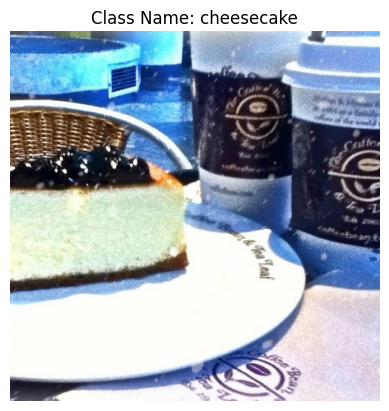

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as im
img=tf.cast(image, dtype=tf.float64)
plt.imshow(img/255.)
plt.title(f'Class Name: {class_names[label]}')
plt.axis(False)

In [ ]:
len(train_data)

75750

In [ ]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## **NOTE** imp imp:
 our images are directly loaded in from the TFDS, so we need cannot use image_from_directory pre-processing function, we need to build one and that should always take two parameters in the function (image,label) because our train data is in a tuple format of image and label

### Custom pre-processing function
- we are just resizing to (224,224) and converting the image dtype to tf.float32 using tf.cast()

In [ ]:
def preprocess_img(image,label,img_shape=224):

  image = tf.image.resize(image,[224,224])

  return tf.cast(image ,tf.float32), label

In [ ]:
preprocess_img(image=image,label=label)[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 84.67857 ,  84.321434,  92.321434],
        [ 87.19898 ,  86.841835,  94.841835],
        [ 84.72959 ,  84.581635,  94.72449 ],
        ...,
        [119.50503 , 194.93877 , 245.85202 ],
        [114.974525, 190.97452 , 241.90309 ],
        [119.071465, 196.4286  , 247.82652 ]],

       [[ 75.647964,  84.21939 ,  93.21939 ],
        [ 71.45407 ,  80.959175,  89.959175],
        [ 78.03061 ,  87.20408 ,  97.47449 ],
        ...,
        [113.31632 , 182.62755 , 249.35715 ],
        [106.57655 , 176.86227 , 245.4337  ],
        [108.601944, 179.9796  , 248.16833 ]],

       [[129.9949  , 152.06633 , 171.4949  ],
        [149.87756 , 171.94899 , 192.66328 ],
        [156.43878 , 178.29593 , 201.22449 ],
        ...,
        [127.94895 , 184.08676 , 236.39796 ],
        [129.41847 , 186.4899  , 238.41847 ],
        [132.56607 , 191.07118 , 243.63744 ]],

       ...,

       [[ 68.23475 ,  72.091934,  90.73993 ],
        [ 67.

### Intuition behind .map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE), .shuffle(buffer_size=1000) and .batch(batch_size=32)
After doing it for one image, we apply **train_data=train_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)**
- num_parallel_calls=tf.data.AUTOTUNE tells colab to use all the compute power it has. Even if there are many(thousands of) images, we can use all the compute power of colab to pre-process the images
- .shuffle() helps to shuffle the data with buffer_size=100 meaning that it will sample/shuffle 100 images at a time, ideally if we have enough memory we can keep it as len(train_data)
- .batch()  making a batch_size = 32


In [ ]:
# Apply preprocessing to the dataset
train_data=train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch the dataset and let's prefetch it
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

### Do the same steps for test_data WHY?
... because remember during image_from_directory.. we used to preprocess (convert them into batches) while loading them from directory to our notevook

In [ ]:
test_data=test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch the dataset and let's prefetch it
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Intuition behind .prefetch(buffer_size=tf.data.AUTOTUNE)

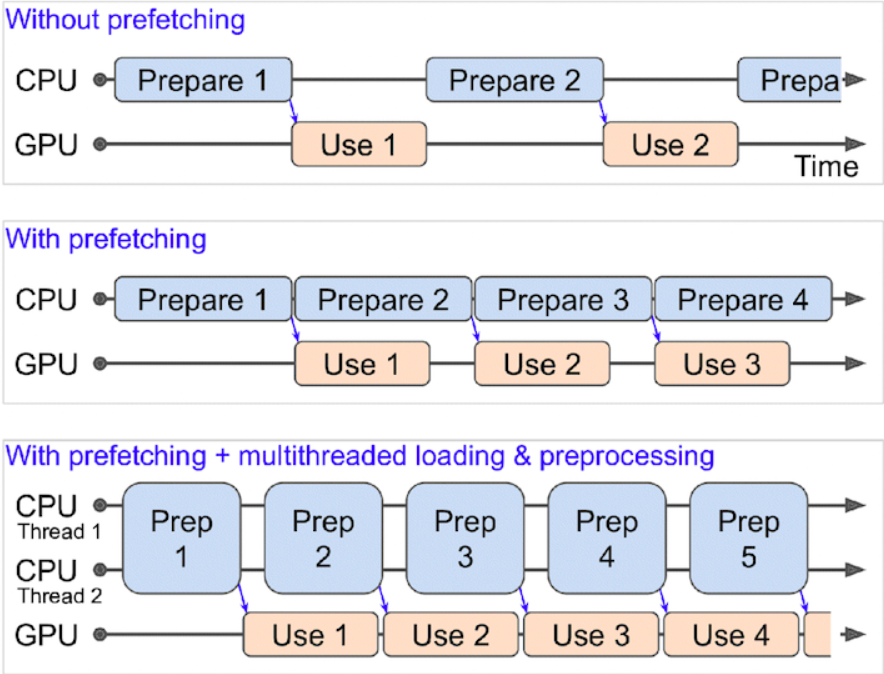



## Create Modelling Callbacks
- **tensorboard callback** from our helper function to visualize in tensorboard
- **ModelCheckPoint** to save our model's progress after feature extraction






In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
checkpoint_path = 'model_checkpoints/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor='val_accuracy',
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      verbose=1)

In [ ]:
tf.__version__

'2.14.0'

## Setup mixed precision training

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Create a Functional Model with a slight difference (separating dense layer and output(activation layer))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SHAPE = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMG_SHAPE)

x = base_model(inputs,training=False)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(len(class_names))(x)

outputs = layers.Activation(activation='softmax',dtype=tf.float32)(x)

model = keras.Model(inputs,outputs)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics='accuracy')

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0         
                                                                 
Total params: 6048693 (23.07 MB)
Trainable params: 129381 (

### Intuition behind MIXED PRECISION
- The idea behind mixed-precision training is to use FP16 for some parts of the neural network training process where lower precision is acceptable, and switch to FP32 where higher precision is necessary to maintain numerical stability. Here's an intuitive breakdown:

- Forward Pass: During the forward pass of the neural network, when inputs are processed through the layers to generate predictions, FP16 can be used. The reduced precision speeds up computations.

- Backward Pass (Gradient Computation): During the backward pass, where gradients are computed for updating the model's parameters, FP16 can again be used. The gradients are used to update the weights of the network.

- Weight Updates: When it comes to updating the model's weights based on the computed gradients, switching back to FP32 is often necessary. This is because the accumulated errors in lower precision may lead to significant inaccuracies in weight updates. Using FP32 in this step helps maintain the numerical stability of the model.

In [ ]:
for layer in model.layers:
  print(layer.name,layer.dtype,layer.trainable,layer.dtype_policy)

input_14 float32 True <Policy "float32">
efficientnetv2-b0 float32 False <Policy "mixed_float16">
global_average_pooling2d_5 float32 True <Policy "mixed_float16">
dense_6 float32 True <Policy "mixed_float16">
activation float32 True <Policy "float32">


In [ ]:
for i,layer in enumerate(model.layers[1].layers):
  print(i,layer.name,layer.dtype,layer.trainable,layer.dtype_policy)

0 input_13 float32 False <Policy "float32">
1 rescaling_6 float32 False <Policy "mixed_float16">
2 normalization_6 float32 False <Policy "mixed_float16">
3 stem_conv float32 False <Policy "mixed_float16">
4 stem_bn float32 False <Policy "mixed_float16">
5 stem_activation float32 False <Policy "mixed_float16">
6 block1a_project_conv float32 False <Policy "mixed_float16">
7 block1a_project_bn float32 False <Policy "mixed_float16">
8 block1a_project_activation float32 False <Policy "mixed_float16">
9 block2a_expand_conv float32 False <Policy "mixed_float16">
10 block2a_expand_bn float32 False <Policy "mixed_float16">
11 block2a_expand_activation float32 False <Policy "mixed_float16">
12 block2a_project_conv float32 False <Policy "mixed_float16">
13 block2a_project_bn float32 False <Policy "mixed_float16">
14 block2b_expand_conv float32 False <Policy "mixed_float16">
15 block2b_expand_bn float32 False <Policy "mixed_float16">
16 block2b_expand_activation float32 False <Policy "mixed_float1

In [ ]:
history_1 = model.fit(train_data,
                      epochs=3,
                      validation_data=test_data,
                      validation_steps=0.25*len(test_data),
                      steps_per_epoch=len(train_data),
                      callbacks=[create_tensorboard_callback('training_logs_1','101_classes_all_data_1'),model_checkpoint ])

Saving TensorBoard log files to: training_logs_1/101_classes_all_data_1/20231114-022501
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7433 - accuracy: 0.5785
Epoch 1: val_accuracy improved from -inf to 0.69129, saving model to model_checkpoints/cp.ckpt
2368/2368 [==============================] - 212s 81ms/step - loss: 1.7433 - accuracy: 0.5785 - val_loss: 1.1609 - val_accuracy: 0.6913
Epoch 2/3
2366/2368 [============================>.] - ETA: 0s - loss: 1.2116 - accuracy: 0.6861
Epoch 2: val_accuracy improved from 0.69129 to 0.72869, saving model to model_checkpoints/cp.ckpt
2368/2368 [==============================] - 191s 79ms/step - loss: 1.2116 - accuracy: 0.6861 - val_loss: 1.0344 - val_accuracy: 0.7287
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0632 - accuracy: 0.7223
Epoch 3: val_accuracy improved from 0.72869 to 0.73485, saving model to model_checkpoints/cp.ckpt
2368/2368 [==============================] - 215s 90ms/ste

In [ ]:
len(train_data)

2368

In [ ]:
results = model.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 0.9979 - accuracy: 0.7274


<Axes: >

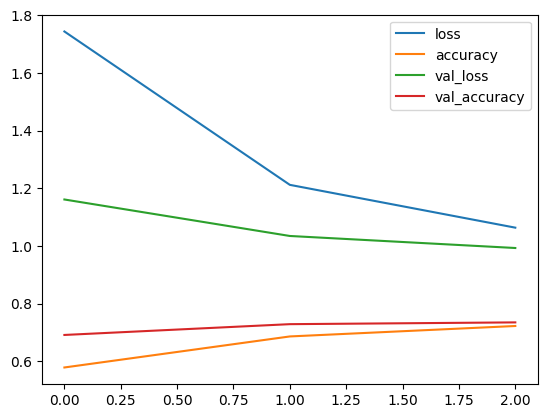

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()